Question:

- How fair is it to define causal direction based on constancy of conditionals?

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures
from hsic import hsic_gam

In [2]:
def f(x, b=0):
    return x +  b*x**3

Fixing b = 1 and identifying causality by constancy of signals

In [3]:
m = 10000000
b = 1

In [4]:
x = np.random.normal(size=(m,1))
n = np.random.normal(size=(m,1))
f_x = f(x, b).flatten()
y = (f(x, b) + n).flatten()

/tmp/ipykernel_62758/450757984.py:35: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(y[group_indices_by_rounded_x(x)[0]], palette='Blues', ax=axes[0], label='$x = -1$')
/tmp/ipykernel_62758/450757984.py:36: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(y[group_indices_by_rounded_x(x)[1]], palette='Oranges', ax=axes[0], label='$x = 0$')
/tmp/ipykernel_62758/450757984.py:37: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(y[group_indices_by_rounded_x(x)[2]], palette='Greens', ax=axes[0], label='$x = 1$')


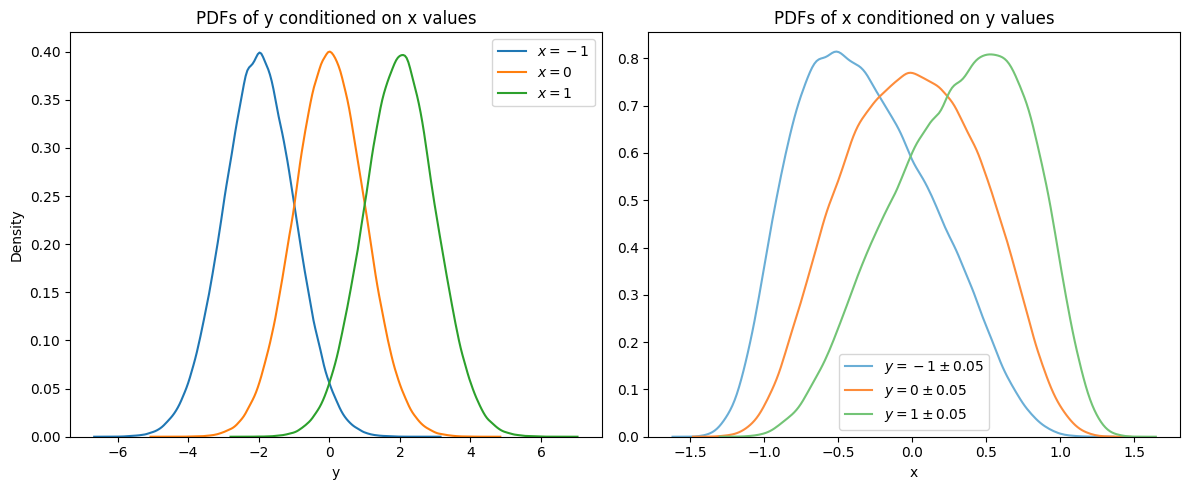

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def group_indices_by_rounded_y(y):
    rounded_y = np.round(y, decimals=1)
    indices_grouped = [[], [], []]  # Lists to hold indices for each rounded value
    
    for i, rounded_value in enumerate(rounded_y):
        if rounded_value == -1.0:
            indices_grouped[0].append(i)
        elif rounded_value == 0.0:
            indices_grouped[1].append(i)
        elif rounded_value == 1.0:
            indices_grouped[2].append(i)
    
    return indices_grouped

def group_indices_by_rounded_x(x):
    rounded_x = np.round(x, decimals=1)
    indices_grouped = [[], [], []]  # Lists to hold indices for each rounded value
    
    for i, rounded_value in enumerate(rounded_x):
        if rounded_value == -1.0:
            indices_grouped[0].append(i)
        elif rounded_value == 0.0:
            indices_grouped[1].append(i)
        elif rounded_value == 1.0:
            indices_grouped[2].append(i)
    
    return indices_grouped

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.kdeplot(y[group_indices_by_rounded_x(x)[0]], palette='Blues', ax=axes[0], label='$x = -1$')
sns.kdeplot(y[group_indices_by_rounded_x(x)[1]], palette='Oranges', ax=axes[0], label='$x = 0$')
sns.kdeplot(y[group_indices_by_rounded_x(x)[2]], palette='Greens', ax=axes[0], label='$x = 1$')
axes[0].set_xlabel('y')
axes[0].set_ylabel('Density')
axes[0].set_title('PDFs of y conditioned on x values')
axes[0].legend()

sns.kdeplot(x[group_indices_by_rounded_y(y)[0]], palette='Blues', ax=axes[1], label='$y = -1 \pm 0.05$')
sns.kdeplot(x[group_indices_by_rounded_y(y)[1]], palette='Oranges', ax=axes[1], label='$y = 0 \pm 0.05$')
sns.kdeplot(x[group_indices_by_rounded_y(y)[2]], palette='Greens', ax=axes[1], label='$y = 1 \pm 0.05$')
axes[1].set_xlabel('x')
axes[1].set_ylabel('')
axes[1].set_title('PDFs of x conditioned on y values')
axes[1].legend()

plt.tight_layout()
plt.savefig("conditionals.pdf")
plt.show()


# Testing causality

Fitting with MLP for 1000 samples

### y by x

In [49]:
import warnings
warnings.filterwarnings("ignore")

In [67]:
m = 1000
b = 1
q = 1

x = np.sort(np.random.normal(size=(m,1)), axis=0)**q
n = np.random.normal(size=(m,1))**q
f_x = f(x, b)
y = (f(x, b) + n)

In [68]:
# Create MLP model
# mlp = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=100)
model = MLPRegressor(hidden_layer_sizes=(1000), activation='relu', solver='adam', max_iter=1000)

# Fit the model
model.fit(x, y)

# Obtain predictions on the entire dataset
y_pred = model.predict(x).reshape(-1,1)

# Print predictions
# print("Predictions (y_pred_cv) from cross-validation:", y_pred_cv)
# print("Predictions (y_pred) on the entire dataset:", y_pred)


In [69]:
# # Create MLP model
# model = LinearRegression()

# # Create PolynomialFeatures transformer to include terms up to x^5
# poly = PolynomialFeatures(degree=5, include_bias=False)
# x_poly = poly.fit_transform(x)

# # Fit the model
# model.fit(x_poly, y)

# # Obtain predictions on the entire dataset
# y_pred = model.predict(x_poly)

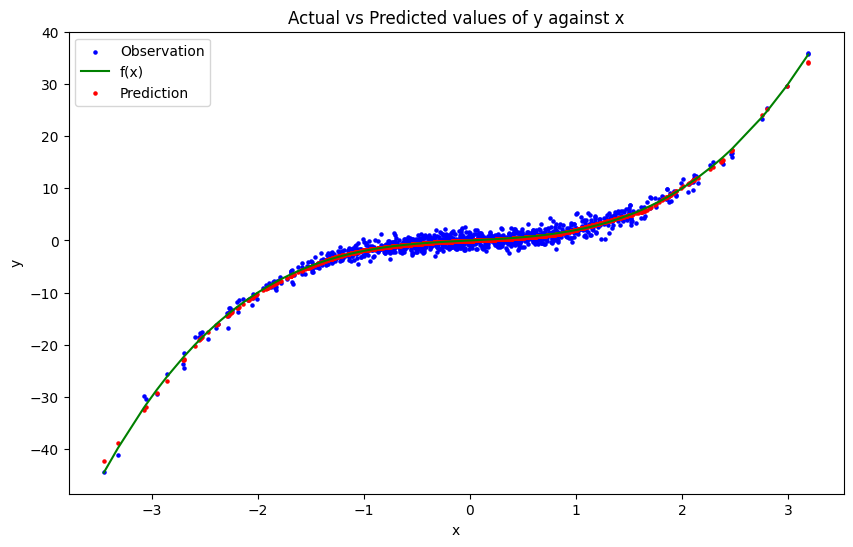

In [70]:
# Plot y and y_pred against x
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Observation', s=5)
plt.plot(x, f_x, color='green', label='f(x)')
plt.scatter(x, y_pred, color='red', label='Prediction', s=5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Actual vs Predicted values of y against x')
plt.legend()
plt.show()

In [71]:
hsic_gam(y - y_pred, x, alph=0.02)

(0.3606338660824604, 0.6701455909188913, True)

# x by y

In [72]:
# m = 1000
# b = 1

# x = np.sort(np.random.normal(size=(m,1)), axis=0)**q
# n = np.random.normal(size=(m,1))**q
# f_x = f(x, b)
# y = (f(x, b) + n)

In [73]:
# Create MLP model
# mlp = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=100)
model = MLPRegressor(hidden_layer_sizes=(1000), activation='relu', solver='adam', max_iter=1000)
# model = LinearRegression()

# Perform cross-validation and obtain predictions
# y_pred_cv = cross_val_predict(mlp, x, y.flatten(), cv=5)

# Fit the model
model.fit(y, x)

# Obtain predictions on the entire dataset
x_pred = model.predict(y).reshape(-1,1)

# Print predictions
# print("Predictions (y_pred_cv) from cross-validation:", y_pred_cv)
# print("Predictions (y_pred) on the entire dataset:", y_pred)

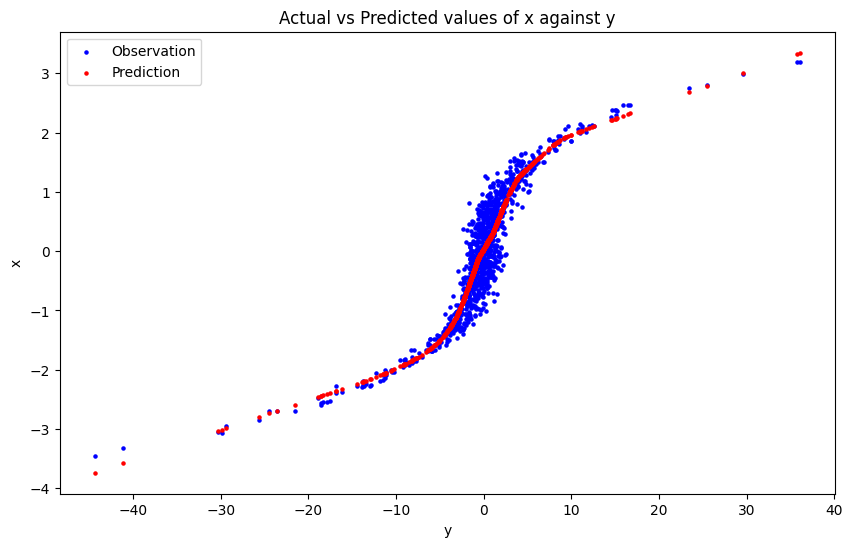

In [74]:
# Plot y and y_pred against x
plt.figure(figsize=(10, 6))
plt.scatter(y, x, color='blue', label='Observation', s=5)
plt.scatter(y, x_pred, color='red', label='Prediction', s=5)
plt.xlabel('y')
plt.ylabel('x')
plt.title('Actual vs Predicted values of x against y')
plt.legend()
plt.show()

In [75]:
hsic_gam(x - x_pred, y, 0.02)

(9.0472825761968, 0.5830069064709952, False)

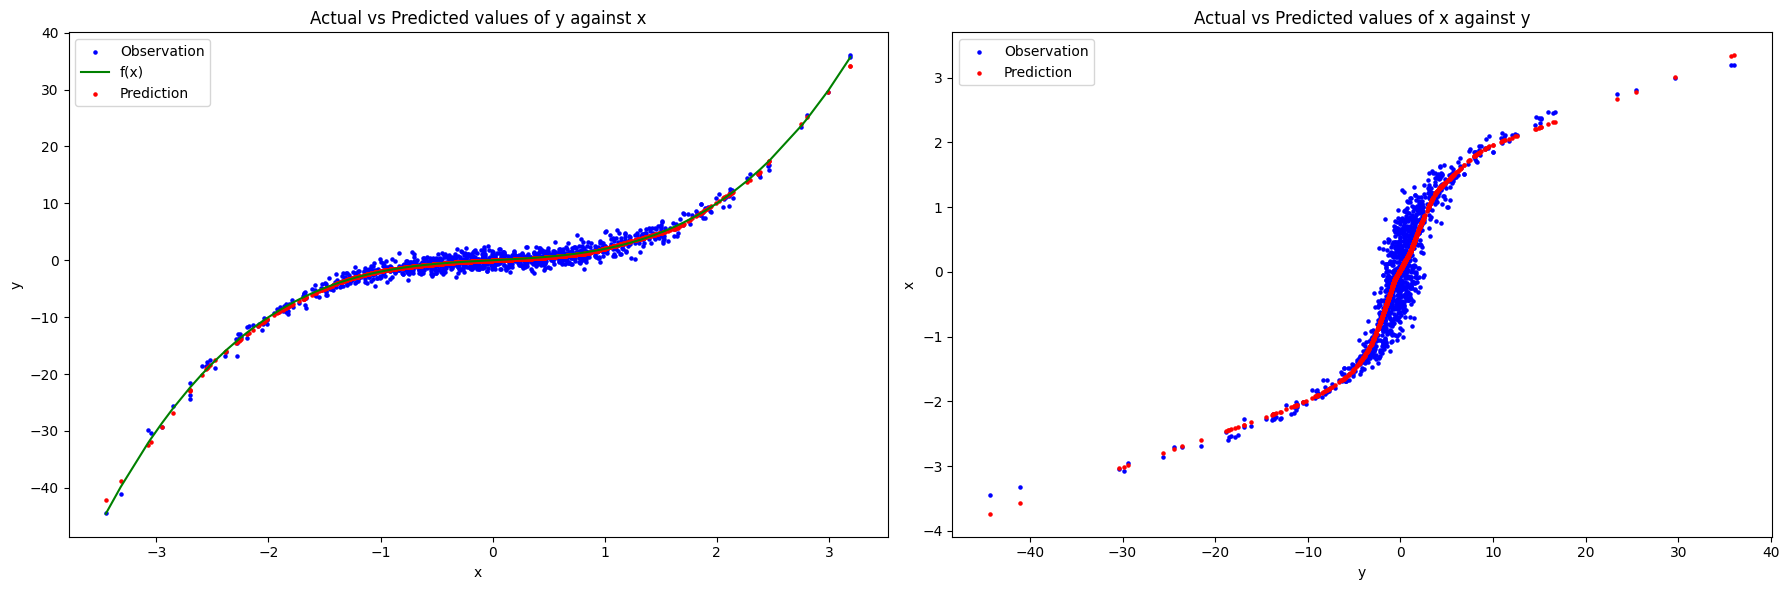

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kendalltau

# Assuming you have defined x, y, f_x, y_pred, and x_pred earlier

# Plot y and y_pred against x
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot 1: Actual vs Predicted values of y against x
axes[0].scatter(x, y, color='blue', label='Observation', s=5)
axes[0].plot(x, f_x, color='green', label='f(x)')
axes[0].scatter(x, y_pred, color='red', label='Prediction', s=5)
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_title('Actual vs Predicted values of y against x')
axes[0].legend()

# Plot 2: Actual vs Predicted values of x against y
axes[1].scatter(y, x, color='blue', label='Observation', s=5)
axes[1].scatter(y, x_pred, color='red', label='Prediction', s=5)
axes[1].set_xlabel('y')
axes[1].set_ylabel('x')
axes[1].set_title('Actual vs Predicted values of x against y')
axes[1].legend()

plt.tight_layout()
plt.savefig("model_fits.pdf")
plt.show()


# Varying b

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
m = 300
n_tests = 10

In [12]:
# Initialize lists to store p-values and values of b

test_results_x = []
b_values = np.arange(-1, 1.1, 0.1)

# Iterate over each value of b
for b in b_values:
    test_results = []

    # Iterate n_tests times
    for _ in range(n_tests):
        # Generate data
        x = np.sort(np.random.normal(size=(m, 1)), axis=0)
        n = np.random.normal(size=(m, 1))
        f_x = f(x, b)
        y = f(x, b) + n
        
        # Create MLP model
        model = MLPRegressor(hidden_layer_sizes=(1000), activation='relu', solver='adam', max_iter=1000)
        
        # Fit the model
        model.fit(x, y)
        
        # Obtain predictions on the entire dataset
        y_pred = model.predict(x)
        
        # Perform HSIC
        stat, thresh, test_result = hsic_gam(y - y_pred.reshape(-1,1), x, 0.02)
        
        # Append the p-value to the list
        test_results.append(test_result)
    
    # Append the average p-value to the list
    # p_values_x.append(np.mean(p_values))
    test_results_x.append(test_results)

# Print the list of p-values
print("List of test results:", test_results_x)

List of test results: [[False, False, False, False, False, False, False, False, False, False], [False, False, False, False, False, False, False, False, False, False], [False, False, False, False, False, False, False, False, True, False], [True, False, False, False, False, False, False, True, False, False], [True, True, True, False, False, True, False, False, False, True], [True, True, False, True, True, True, True, True, True, True], [True, True, True, True, True, True, True, False, True, True], [True, True, True, True, True, True, True, True, True, True], [True, True, True, True, True, True, True, True, True, True], [True, True, True, True, True, True, True, True, True, True], [True, True, True, True, True, True, True, True, True, True], [True, True, True, True, True, True, True, True, True, True], [True, True, True, True, True, False, True, True, True, True], [True, True, True, True, True, False, False, True, True, True], [False, False, True, False, True, False, False, False, False, 

In [13]:
# Initialize lists to store p-values and values of b

test_results_y = []
b_values = np.arange(-1, 1.1, 0.1)

# Iterate over each value of b
for b in b_values:
    test_results = []

    # Iterate n_tests times
    for _ in range(n_tests):
        # Generate data
        x = np.sort(np.random.normal(size=(m, 1)), axis=0)
        n = np.random.normal(size=(m, 1))
        f_x = f(x, b)
        y = f(x, b) + n
        
        # Create MLP model
        model = MLPRegressor(hidden_layer_sizes=(1000), activation='relu', solver='adam', max_iter=1000)
        
        # Fit the model
        model.fit(y, x)
        
        # Obtain predictions on the entire dataset
        x_pred = model.predict(y)
        
        # Perform HSIC
        stat, thresh, test_result = hsic_gam(x - x_pred.reshape(-1,1), y, 0.02)
        
        # Append the p-value to the list
        test_results.append(test_result)
    
    # Append the average p-value to the list
    # p_values_x.append(np.mean(p_values))
    test_results_y.append(test_results)

# Print the list of p-values
print("List of test results:", test_results_y)

List of test results: [[False, False, False, False, False, False, False, False, True, False], [False, False, False, False, False, False, False, False, False, False], [False, True, False, False, False, False, False, False, False, False], [False, False, False, False, False, False, False, False, False, False], [False, False, False, False, False, False, False, False, False, False], [False, False, False, False, False, False, False, False, False, False], [False, False, False, False, False, False, False, False, True, False], [False, False, False, False, False, False, False, False, False, True], [False, True, True, True, True, False, False, True, False, True], [True, True, True, True, True, True, True, True, True, True], [True, True, True, True, True, True, True, False, True, True], [True, True, True, True, True, True, True, True, True, True], [True, True, True, True, True, True, False, True, True, True], [True, True, True, False, True, False, False, True, False, True], [True, False, False, Fa

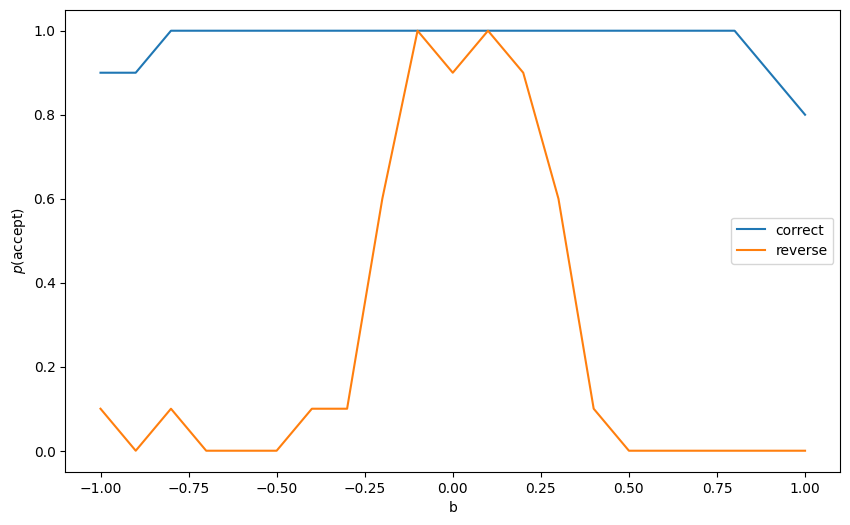

In [85]:
fig, ax = plt.subplots(figsize=(10, 6))

plt.plot(b_values, [sum(t)/len(t) for t in test_results_x])
plt.plot(b_values, [sum(t)/len(t) for t in test_results_y], linestyle="-")
plt.xlabel("b")
plt.ylabel("$p$(accept)")
plt.savefig("acceptance_plot_b.pdf")
plt.legend(["correct", "reverse"])

### Varying q

In [78]:
m = 300
n_tests = 30
b = 0

In [79]:
# Initialize lists to store p-values and values of b

test_results_x_q = []
q_values = np.arange(0.5, 2.1, 0.1)

# Iterate over each value of b
for q in q_values:
    test_results = []

    # Iterate n_tests times
    for _ in range(n_tests):
        # Generate data
        x = np.sort(np.random.normal(size=(m, 1)), axis=0)
        x = (x /( 0.000001 + abs(x))) * abs(x) ** q
        n = np.random.normal(size=(m, 1))
        n = (n / (0.000001 + abs(n))) * abs(n) ** q
        f_x = f(x, b)
        y = f(x, b) + n
        
        # Create MLP model
        model = MLPRegressor(hidden_layer_sizes=(1000), activation='relu', solver='adam', max_iter=100)
        
        # Fit the model
        model.fit(x, y)
        
        # Obtain predictions on the entire dataset
        y_pred = model.predict(x)
        
        # Perform HSIC
        stat, thresh, test_result = hsic_gam(y - y_pred.reshape(-1,1), x, 0.02)
        
        # Append the p-value to the list
        test_results.append(test_result)
    
    # Append the average p-value to the list
    # p_values_x.append(np.mean(p_values))
    test_results_x_q.append(test_results)

# Print the list of p-values
print("List of test results:", test_results_x_q)

List of test results: [[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True], [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True], [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True], [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True], [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True], [True, True, True, True, True, True, True, True, True, True, True, 

In [80]:
# Initialize lists to store p-values and values of b

test_results_y_q = []
q_values = np.arange(0.5, 2.1, 0.1)

# Iterate over each value of b
for q in q_values:
    test_results = []

    # Iterate n_tests times
    for _ in range(n_tests):
        # Generate data
        x = np.sort(np.random.normal(size=(m, 1)), axis=0)
        x = (x /( 0.000001 + abs(x))) * abs(x) ** q
        n = np.random.normal(size=(m, 1))
        n = (n / (0.000001 + abs(n))) * abs(n) ** q
        f_x = f(x, b)
        y = f(x, b) + n
        
        # Create MLP model
        model = MLPRegressor(hidden_layer_sizes=(1000), activation='relu', solver='adam', max_iter=100)
        
        # Fit the model
        model.fit(y, x)
        
        # Obtain predictions on the entire dataset
        x_pred = model.predict(y)
        
        # Perform HSIC
        stat, thresh, test_result = hsic_gam(x - x_pred.reshape(-1,1), y, 0.02)
        
        # Append the p-value to the list
        test_results.append(test_result)
    
    # Append the average p-value to the list
    # p_values_x.append(np.mean(p_values))
    test_results_y_q.append(test_results)

# Print the list of p-values
print("List of test results:", test_results_y_q)

List of test results: [[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False], [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False], [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False], [False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, True, False, False, False, True, False], [False, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True

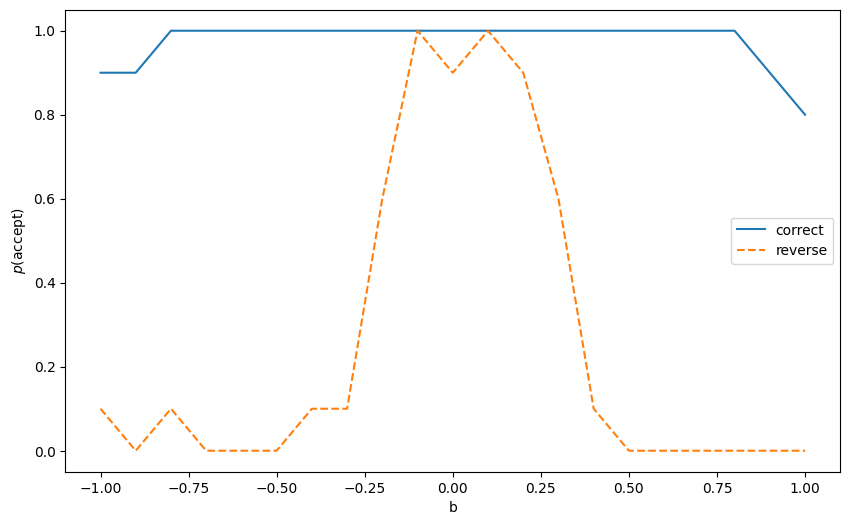

In [87]:
fig, ax = plt.subplots(figsize=(10, 6))

plt.plot(b_values, [sum(t)/len(t) for t in test_results_x])
plt.plot(b_values, [sum(t)/len(t) for t in test_results_y], linestyle="--")
plt.xlabel("b")
plt.ylabel("$p$(accept)")
plt.savefig("acceptance_plot_b.pdf")
plt.legend(["correct", "reverse"])

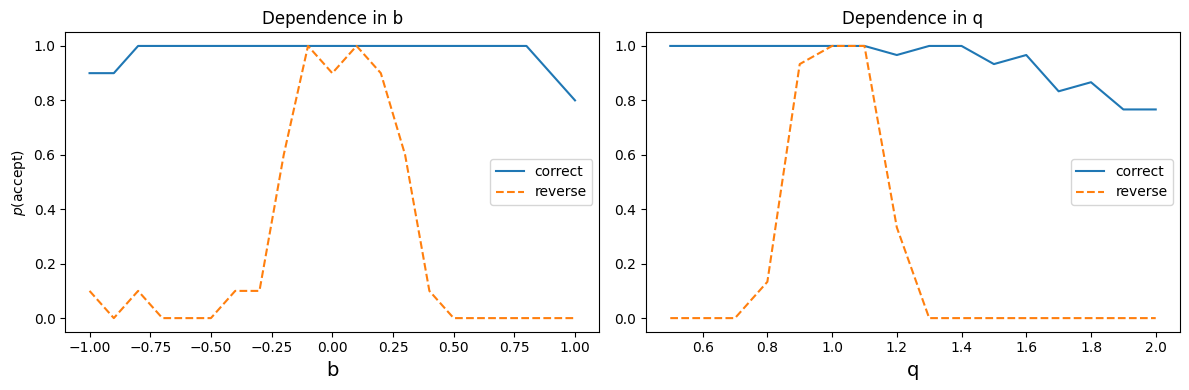

In [93]:
# Your code for the first plot
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# First plot
plt.subplot(1, 2, 1)
plt.plot(b_values, [sum(t)/len(t) for t in test_results_x])
plt.plot(b_values, [sum(t)/len(t) for t in test_results_y], linestyle="--")
plt.xlabel("b", fontsize=14)
plt.ylabel("$p$(accept)")
plt.title("Dependence in b")
plt.legend(["correct", "reverse"])

# Second plot
plt.subplot(1, 2, 2)
plt.plot(q_values, [sum(t)/len(t) for t in test_results_x_q])
plt.plot(q_values, [sum(t)/len(t) for t in test_results_y_q], linestyle="--")
plt.xlabel("q", fontsize=14)
plt.ylabel("")
plt.title("Dependence in q")
plt.legend(["correct", "reverse"])

plt.tight_layout()
plt.savefig("comparisons.pdf")
plt.show()
